In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Import dataset
file_path = "train_data.csv"
train_df = pd.read_csv(file_path)
print(train_df.columns)

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)


# -Data Dictionary-
## Temperature: 
Daily maximum and minimum temperature measurements at 2 meters from 1979 onwards.
From the NOAA Climate Prediction Center (CPC) Global Gridded Temp dataset, Celsius.
official contest target temp is tmp2m = tmax + tmin / 2

## Global Precipitation: 
Daily precipitation data from 1979 onwards.
From NOAA's CPC Gauge-Based Analysis of Global Daily Precip converted to mm.

## U.S. precipitation: 
Daily U.S. precip in mm.
From CPC Unified Gauge-Based Analysis of Daily Precip over CONUS
These are sums over two-week periods.

## Sea Surface Temp and Sea Ice Concentration: 
NOAA's Optimum Interpolation Sea Surface Temp (SST)
Provides SST and sea ice concentration data, daily from 1981 to present.

## Multivariate ENSO index (MEI): 
Bimonthly MEI values from 1949 to the present.
MEI is a scalar summary of six variables (sea-level pressure, zonal and meridional
surface wind components, SST, surface air temp, and sky cloudiness)
This is associated with El Nino/Soutern Oscillation.

## Madden-Julian oscillation (MJO): 
Daily MJO values since 1974 

## Relative Humidity, Sea Level Pressure, and Precipitable water for the entire atmosphere: 
NOAA's National Center for Environmental Prediction

## Geopotential height, zonal wind, and longitudal wind: 
To capture polar vortex variability.

## North American Multi-Model Ensemble (NMME). 
Collection of physics based forecasts.

## Pressure and potential evaporation:

## Elevation:

## Koppen-Geiger climate classifications



# Variable naming
Each variable name, prefix__suffix, consists of two parts (separated by a double underscore) that inform you of the meaning of the variable. 
The prefix indicates from which of the above-listed file the variable was derived 
(e.g. Madden-Julian oscillation, pressure, and potential evaporation from NOAA's surface_gauss etc), 
the suffix indicates the specific type of information that was extracted from the file.

# Variable prefixes
contest-slp-14d: file containing sea level pressure (slp)

nmme0-tmp2m-34w: file containing most recent monthly NMME model forecasts for tmp2m (cancm30,
cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0,
nmme0mean) and average forecast across those models (nmme0mean)

contest-pres-sfc-gauss-14d: pressure

mjo1d: MJO phase and amplitude

contest-pevpr-sfc-gauss-14d: potential evaporation

contest-wind-h850-14d: geopotential height at 850 millibars

contest-wind-h500-14d: geopotential height at 500 millibars
contest-wind-h100-14d: geopotential height at 100 millibars

contest-wind-h10-14d: geopotential height at 10 millibars

contest-wind-vwnd-925-14d: longitudinal wind at 925 millibars

contest-wind-vwnd-250-14d: longitudinal wind at 250 millibars
contest-wind-uwnd-250-14d: zonal wind at 250 millibars

contest-wind-uwnd-925-14d: zonal wind at 925 millibars

contest-rhum-sig995-14d: relative humidity

contest-prwtr-eatm-14d: precipitable water for entire atmosphere
nmme-prate-34w: weeks 3-4 weighted average of monthly NMME model forecasts for precipitation

nmme-prate-56w: weeks 5-6 weighted average of monthly NMME model forecasts for precipitation
nmme0-prate-56w: weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation

nmme0-prate-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for precipitation

nmme-tmp2m-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

nmme-tmp2m-56w: weeks 5-6 weighted average of monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

mei: MEI (mei), MEI rank (rank), and Niño Index Phase (nip)

elevation: elevation

contest-precip-14d: measured precipitation

climateregions: Köppen-Geigerclimateclassifications

# Variables without prefix
Some variables do not have a prefix. 
Instead, each variable name in its entirely indicates the information the variable captures.

lat: latitude of location (anonymized)
lon: longitude of location (anonymized)
startdate: startdate of the 14 day period
sst: sea surface temperature
icec: sea ice concentration
cancm30, cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0, nmme0mean: most recent 
forecasts from weather models

# Target
contest-tmp2m-14d__tmp2m: the arithmetic mean of the max and min observed temperature over the next 14 days for 
each location and start date, computed as (measured max temperature + measured mini temperature) / 2


In [3]:
'''
Most variable names have a prefix__suffix format
These lists should select what prefixes and suffixes we want to

contest-slp-14d: file containing sea level pressure (slp)

nmme0-tmp2m-34w: file containing most recent monthly NMME model forecasts for tmp2m (cancm30,
cancm40, ccsm30, ccsm40, cfsv20, gfdlflora0, gfdlflorb0, gfdl0, nasa0,
nmme0mean) and average forecast across those models (nmme0mean)

contest-pres-sfc-gauss-14d: pressure

mjo1d: MJO phase and amplitude

contest-pevpr-sfc-gauss-14d: potential evaporation

contest-wind-h850-14d: geopotential height at 850 millibars

contest-wind-h500-14d: geopotential height at 500 millibars
contest-wind-h100-14d: geopotential height at 100 millibars

contest-wind-h10-14d: geopotential height at 10 millibars

contest-wind-vwnd-925-14d: longitudinal wind at 925 millibars

contest-wind-vwnd-250-14d: longitudinal wind at 250 millibars
contest-wind-uwnd-250-14d: zonal wind at 250 millibars

contest-wind-uwnd-925-14d: zonal wind at 925 millibars

contest-rhum-sig995-14d: relative humidity

contest-prwtr-eatm-14d: precipitable water for entire atmosphere
nmme-prate-34w: weeks 3-4 weighted average of monthly NMME model forecasts for precipitation

nmme-prate-56w: weeks 5-6 weighted average of monthly NMME model forecasts for precipitation
nmme0-prate-56w: weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation

nmme0-prate-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for precipitation

nmme-tmp2m-34w: weeks 3-4 weighted average of most recent monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

nmme-tmp2m-56w: weeks 5-6 weighted average of monthly NMME model forecasts for target label, contest-tmp2m-14d__tmp2m

mei: MEI (mei), MEI rank (rank), and Niño Index Phase (nip)

elevation: elevation

contest-precip-14d: measured precipitation

climateregions: Köppen-Geigerclimateclassifications
'''
from datetime import datetime
import time

# prefixes = ["contest-slp-14d", "contest-pres-sfc-gauss-14d", "mjo1d"]
# suffixes = []

no_fix_vars = ["lat", "lon", "startdate", "nmme0mean", "nasa0"]
train_df_skim = train_df[no_fix_vars]
train_df_skim["unix_time"] = (pd.to_datetime(train_df_skim['startdate'], format='%m/%d/%y')- pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
display(train_df_skim)

C:\Users\minic\AppData\Local\Temp\ipykernel_23488\1631243585.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_skim["unix_time"] = (pd.to_datetime(train_df_skim['startdate'], format='%m/%d/%y')- pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,lat,lon,startdate,nmme0mean,nasa0,unix_time
0,0.0,0.833333,9/1/14,30.65,29.51,1409529600
1,0.0,0.833333,9/2/14,30.65,29.51,1409616000
2,0.0,0.833333,9/3/14,30.65,29.51,1409702400
3,0.0,0.833333,9/4/14,30.65,29.51,1409788800
4,0.0,0.833333,9/5/14,30.65,29.51,1409875200
...,...,...,...,...,...,...
375729,1.0,0.866667,8/27/16,24.44,26.18,1472256000
375730,1.0,0.866667,8/28/16,24.44,26.18,1472342400
375731,1.0,0.866667,8/29/16,24.44,26.18,1472428800
375732,1.0,0.866667,8/30/16,24.44,26.18,1472515200


In [4]:
X_cols = ["unix_time", "lat", "lon", "nmme0mean"]
y_cols = ["nasa0"]
train_X = train_df_skim[X_cols]
train_y = train_df_skim[y_cols]

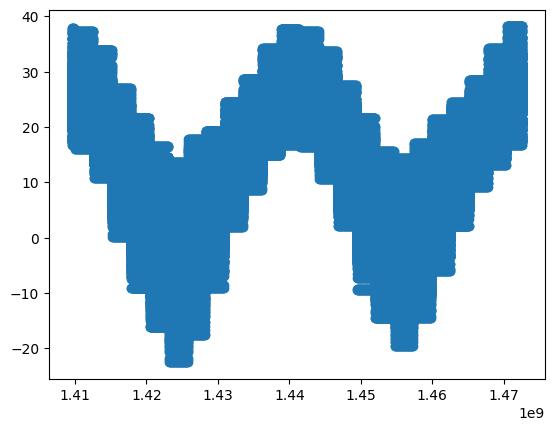

In [5]:
plt.scatter(train_X["unix_time"], train_y["nasa0"])
plt.show()

In [6]:
# Plot loss history
import matplotlib.pyplot as plt
import seaborn as sns

def train_model(model, x_train, y_train, x_test, y_test, epochs=100, val_split=0.1):
    # Train the neural network model 
    # Include validation split (optional)... this is outside the test_set!
    # We may use this for K-crossfold validation if we want to really test a model
    train_hist = model.fit(x=x_train, y=y_train, validation_split=val_split, epochs=epochs)
    test_result = model.evaluate(x=x_test, y=y_test)

    return train_hist, test_result
    
def show_results(train_hist, test_result, model_name="model"):
    loss_hist = train_hist.history['loss']
    val_loss_hist = train_hist.history['val_loss']

    plt.plot(loss_hist, label="Training Loss")
    plt.plot(val_loss_hist, label="Validation Loss")
    plt.title(f"Categorical Cross Entropy Loss History of {model_name}.")
    plt.legend()
    plt.savefig("Figures/" + model_name + "/loss")
    plt.show()
    

    print(f"Mean Squared Error Loss of {model_name} on Test Set: ", test_result[0])
    print(f"Accuracy of {model_name} on Test Set: ", test_result[1])




In [7]:
# Standardize Training data
def get_standard_data(df_x, df_y):
    for col in df_x.columns:
        mean = np.mean(df_x[col])
        std = np.std(df_x[col])

        df_x.loc[:, col] = (df_x.loc[:, col] - mean) / std  # Normalize data to have mean of 0 and std of 1.

    for col in df_y.columns:
        mean = np.mean(df_y[col])
        std = np.std(df_y[col])

        df_y.loc[:, col] = (df_y.loc[:, col] - mean) / std  # Normalize data to have mean of 0 and std of 1.

    return df_x, df_y

norm_x, norm_y = get_standard_data(train_X, train_y)

In [8]:
import model_api as api
%load_ext autoreload

%autoreload 2

neural_network = api.NN_regression(len(X_cols), len(y_cols), 256, 3, verbose=True)
train_hist = neural_network.fit(x=norm_x, y=norm_y, validation_split=0.1, epochs=100)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 83009 (324.25 KB)
Trainable params: 83009 (324

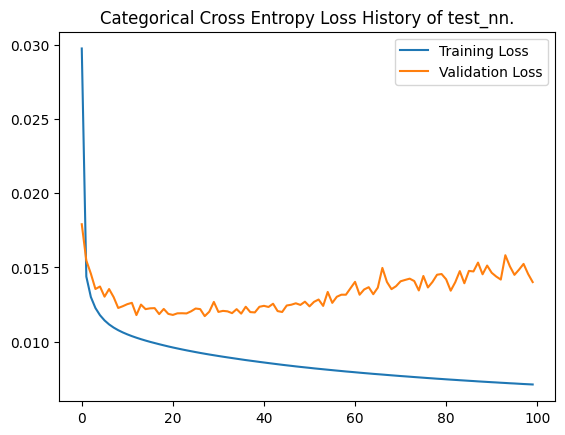

In [9]:
model_name = "test_nn"
loss_hist = train_hist.history['loss']
val_loss_hist = train_hist.history['val_loss']
plt.plot(loss_hist, label="Training Loss")
plt.plot(val_loss_hist, label="Validation Loss")
plt.title(f"Categorical Cross Entropy Loss History of {model_name}.")
plt.legend()
plt.savefig("Figures/" + model_name + "/loss")
plt.show()

In [15]:
train_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [18]:
if 'contest-slp-14d' in train_df.columns:
    print("Variable 'contest-slp-14d' exists in the dataset.")
else:
    print("Variable 'contest-slp-14d' does not exist in the dataset.")

Variable 'contest-slp-14d' does not exist in the dataset.


In [24]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing your variables

# Define window size
window_size = 7  # For example, a 7-day rolling window

# Calculate rolling mean for sea level pressure
train_df['rolling_nmme0_mean'] = train_df['nmme0-tmp2m-34w__cancm30'].rolling(window=window_size).mean()

# Calculate rolling sum for precipitation
train_df['rolling_nmme0_sum'] = train_df['nmme0-tmp2m-34w__cancm30'].rolling(window=window_size).sum()

# Calculate rolling mean for temperature
train_df['rolling_pevpr_mean'] = train_df['contest-pevpr-sfc-gauss-14d__pevpr'].rolling(window=window_size).mean()

# Calculate rolling sum for potential evaporation
train_df['rolling_pevpr_sum'] = train_df['contest-pevpr-sfc-gauss-14d__pevpr'].rolling(window=window_size).sum()


In [26]:
#Print the DataFrame with the new rolling statistics columns
print(train_df[['rolling_nmme0_mean', 'rolling_nmme0_sum', 'rolling_pevpr_mean', 'rolling_pevpr_sum']])

        rolling_nmme0_mean  rolling_nmme0_sum  rolling_pevpr_mean  \
0                      NaN                NaN                 NaN   
1                      NaN                NaN                 NaN   
2                      NaN                NaN                 NaN   
3                      NaN                NaN                 NaN   
4                      NaN                NaN                 NaN   
...                    ...                ...                 ...   
375729           23.621429             165.35          339.587143   
375730           23.375714             163.63          328.755714   
375731           23.130000             161.91          319.567143   
375732           23.130000             161.91          312.997143   
375733           23.130000             161.91          307.737143   

        rolling_pevpr_sum  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...